In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('data/train.csv')


<h2>Sale price distribution</h2>

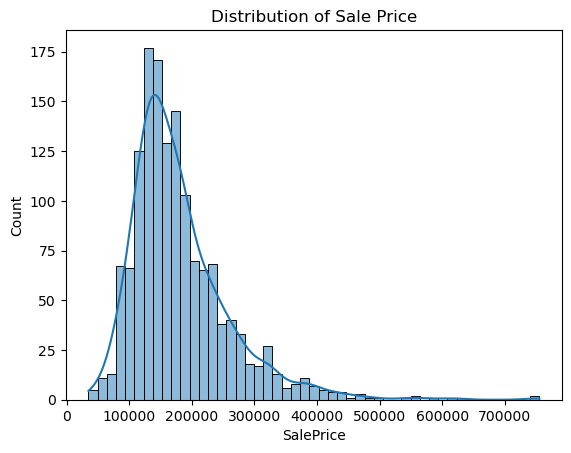

In [362]:
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()
#gamma distribution


<h2>Numerical Features</h2>

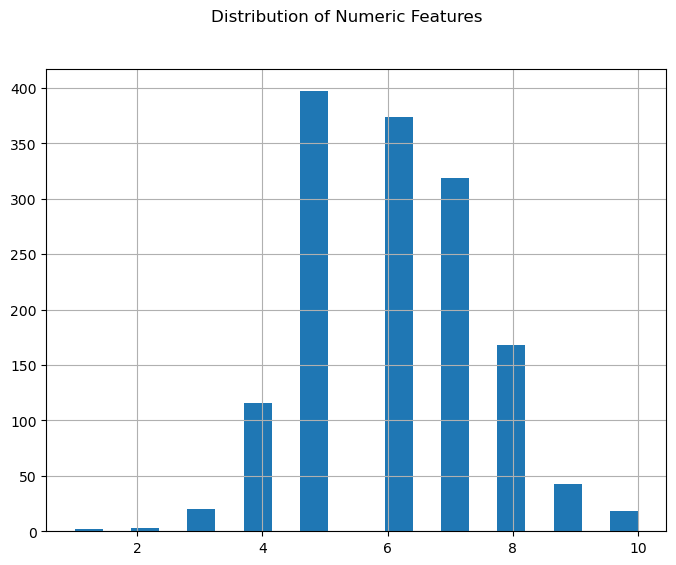

In [363]:
# Feature Distribution
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data['OverallQual'].hist(bins=20, figsize=(8, 6))
plt.suptitle("Distribution of Numeric Features")
plt.show()

<h3>Feature Correlation</h3>

Top Features Correlated with SalePrice:


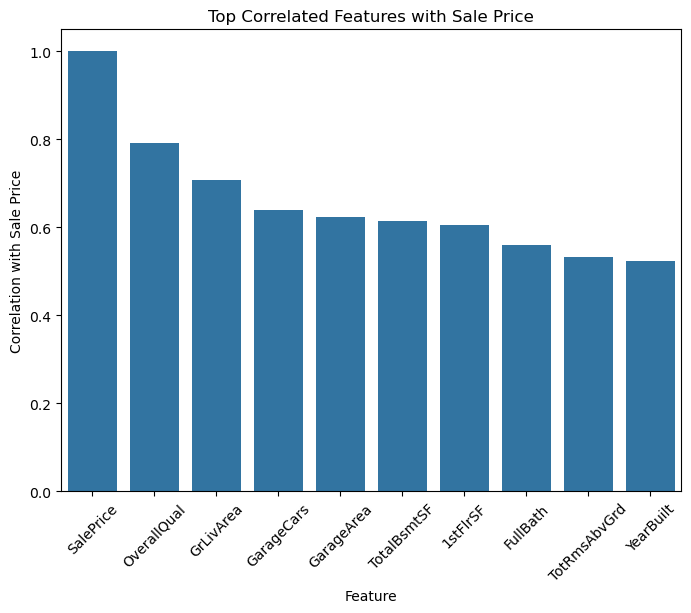

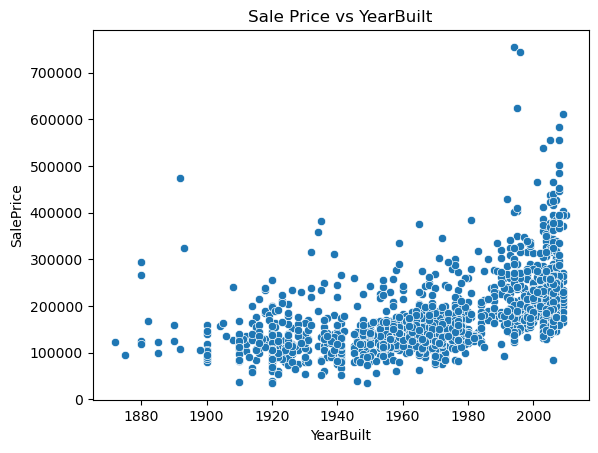

In [364]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

corr_with_target = numeric_data.corr()['SalePrice'].sort_values(ascending=False)
print("Top Features Correlated with SalePrice:")
top_corr=corr_with_target.head(10)

#Top features bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.index, y=top_corr.values)
plt.title("Top Correlated Features with Sale Price")
plt.xlabel("Feature")
plt.ylabel("Correlation with Sale Price")
plt.xticks(rotation=45)
plt.show()

 # Top correlated features excluding SalePrice

feature='YearBuilt' #Change this to whatever numerical feature
sns.scatterplot(x=data['YearBuilt'], y=data['SalePrice'])
plt.title(f'Sale Price vs {feature}')
plt.show()


<h3>Missing Values</h3>

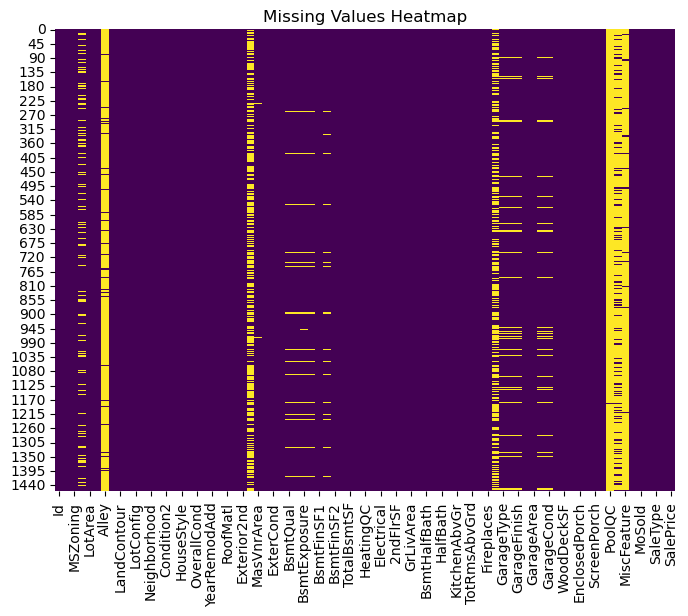

In [365]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

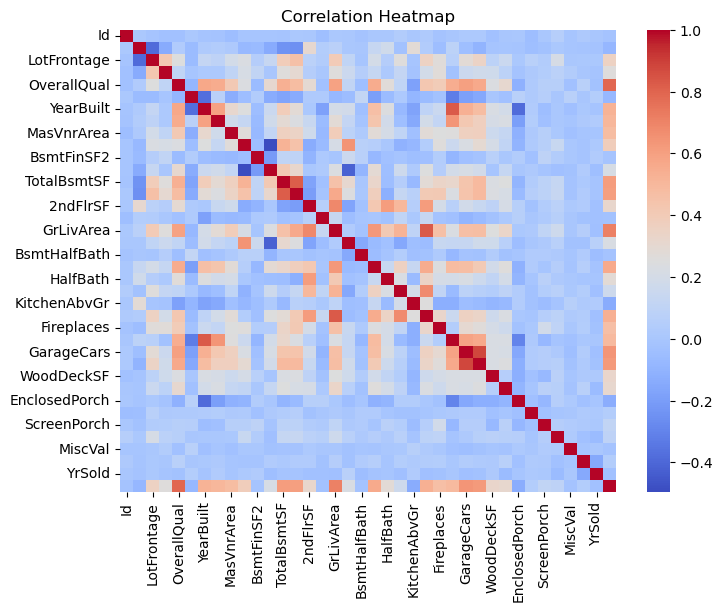

In [366]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

<h2>Categorical Features</h2>

In [367]:
#Print categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [368]:
#Unique values for each category
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
Alley: [nan 'Grvl' 'Pave']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['Vi

In [369]:
# Summarize SalePrice by each category in categorical columns
for col in categorical_cols:
    grouped = data.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    print(f"\n{col}:\n")
    print(grouped)


MSZoning:

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64

Street:

Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64

Alley:

Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64

LotShape:

LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64

LandContour:

LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64

Utilities:

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

LotConfig:

LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: float64

LandSlope:

LandSlope
Sev    204379.230769
Mod    196734.138462
Gtl    17995

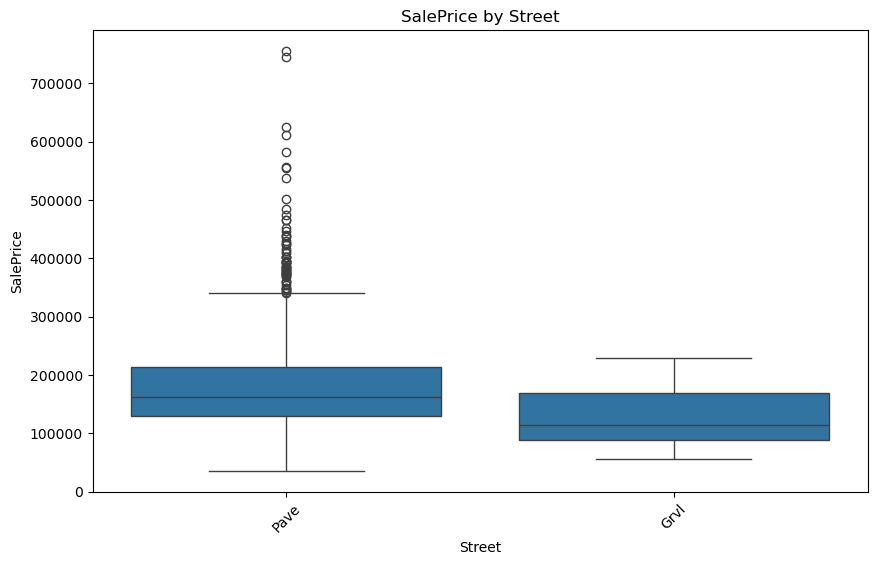

In [370]:
# Plot SalePrice distribution for specific categories (change x for category name)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Street', y='SalePrice', data=data)
plt.xticks(rotation=45)
plt.title(f"SalePrice by Street")
plt.show()


In [371]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Compute correlations with SalePrice
correlations = data_encoded.corr()['SalePrice'].sort_values(ascending=False)

# Display top positively and negatively correlated features
print("Top Correlated Features with SalePrice:\n")
print(correlations.head(10))  # Most positively correlated
print("\nMost Negatively Correlated Features with SalePrice:\n")
print(correlations.tail(10))  # Most negatively correlated


Top Correlated Features with SalePrice:

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Most Negatively Correlated Features with SalePrice:

BsmtExposure_No     -0.263600
LotShape_Reg        -0.267672
MSZoning_RM         -0.288065
HeatingQC_TA        -0.312677
Foundation_CBlock   -0.343263
GarageType_Detchd   -0.354141
GarageFinish_Unf    -0.410608
BsmtQual_TA         -0.452394
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, dtype: float64


<h2>Feature Importance</h2>

<h3>Random Forest</h3>


Top 10 Features Affecting Sale Price:

OverallQual    0.559476
GrLivArea      0.122600
2ndFlrSF       0.034636
TotalBsmtSF    0.033733
BsmtFinSF1     0.029085
1stFlrSF       0.026860
LotArea        0.016491
GarageArea     0.015406
YearBuilt      0.012500
GarageCars     0.012463
dtype: float64


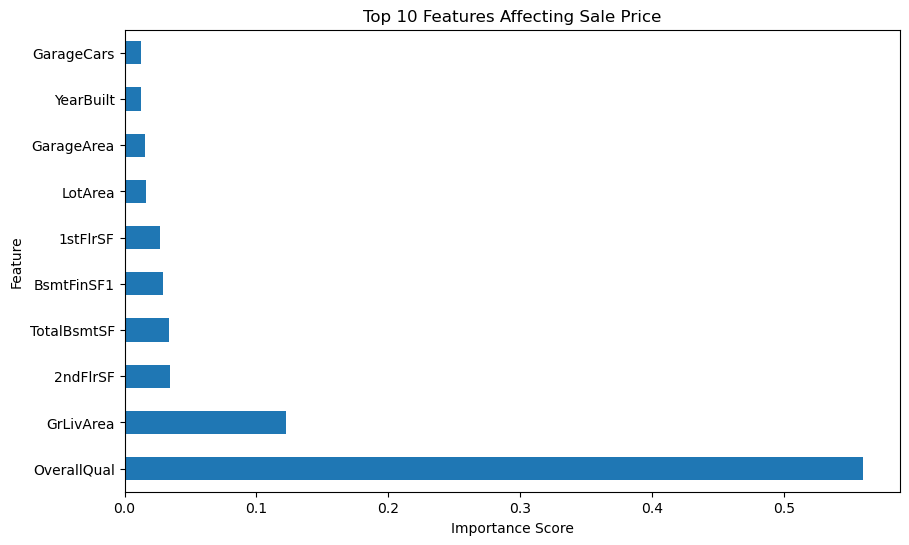

In [372]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data for modeling
X = data_encoded.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top 10 most important features
print("\nTop 10 Features Affecting Sale Price:\n")
print(importances.head(10))

# Plot feature importance
importances.head(10).plot(kind='barh', figsize=(10, 6))
plt.title("Top 10 Features Affecting Sale Price")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


<h2>Models

<h3>Preprocessing

In [378]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, GammaRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import statsmodels.api as sm

train_data = pd.read_csv('data/train.csv')

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

#separate features and target vars
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

print(X.shape)
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#apply the preprocessing steps
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape

(1460, 80)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [14, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(1168, 259)

<h3>Model 1: Sklearn normal linear regression

In [379]:
from sklearn.linear_model import LinearRegression

#Fit normal linear regression model and predict
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("LR Mean Squared Error:", rmse)
relative_error = rmse / y.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%\n")


LR Mean Squared Error: 38093.08807112032
Relative Error (as a percentage): 21.055072007259103 %



<h3>Model 2: Sklearn Gamma Regression

In [380]:
from sklearn.linear_model import GammaRegressor
#Fit Gamma linear regression model and predict
glr = GammaRegressor()
glr.fit(X_train, y_train)
y_pred = glr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")

#Cross validation score
gamma_cv = cross_val_score(glr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gamma_cv_rmse = (-gamma_cv.mean())**0.5
print("Gamma CV RMSE:", gamma_cv_rmse)



Gamma LR Mean Squared Error: 33272.50224463077
Relative Error (as a percentage): 18.390604860242497 %
Gamma CV RMSE: 51295.24235360823


<h3>Model 3: Statsmodels Gamma Regression

In [381]:
# Convert preprocessed data into pandas DataFrames for statsmodels compatibility
# Use the feature names from preprocessing
feature_names = preprocessor.get_feature_names_out()

X_train_preprocessed = X_train.toarray()
X_test_preprocessed = X_test.toarray()

X_train_preprocessed = pd.DataFrame(X_train_preprocessed, columns=feature_names)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed, columns=feature_names)

# Add a constant (intercept term)
X_train_preprocessed = sm.add_constant(X_train_preprocessed)
X_test_preprocessed = sm.add_constant(X_test_preprocessed)
X_train_preprocessed.index = y_train.index

# Fit a Gamma Regression model
gamma_model = sm.GLM(y_train, X_train_preprocessed, family=sm.families.Gamma(sm.families.links.log()))
gamma_results = gamma_model.fit()

# Print model summary
#print(gamma_results.summary())

# Predict on the test set
y_pred = gamma_results.predict(X_test_preprocessed)

# Evaluate performance
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


Gamma LR Mean Squared Error: 25445.680546823005
Relative Error (as a percentage): 14.064510474624637 %


<h3>Regularization

<h4>Sklearn Gamma with L2

In [ ]:
glrRidge = GammaRegressor(alpha=0.01, max_iter=100000)  # alpha is the L2 regularization strength
glrRidge.fit(X_train, y_train)
y_pred = glrRidge.predict(X_test)


# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y_test.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")


#Cross validation score
gamma_cv = cross_val_score(glrRidge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
gamma_cv_rmse = np.sqrt(-gamma_cv.mean())
print("CV RMSE:", gamma_cv_rmse)

ValueError: could not convert string to float: 'RL'

<h4>Sklearn Ridge Regression

In [384]:
ridge = Ridge(alpha=10, max_iter=1000)  # alpha is the L2 regularization strength
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Gamma LR Mean Squared Error:", rmse)
relative_error = rmse / y_test.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")


#Cross validation score
gamma_cv = cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
gamma_cv_rmse = np.sqrt(-gamma_cv.mean())
print("CV RMSE:", gamma_cv_rmse)

Gamma LR Mean Squared Error: 30626.816213964445
Relative Error (as a percentage): 17.12527872426895 %
CV RMSE: 33858.04845122686


<h4>Sklearn ridge regression with cross validation

In [385]:
# Define Ridge regression model
ridge = Ridge(alpha=10, max_iter=1000)  # alpha is the L2 regularization strength

# Define RMSE scoring function for cross-validation
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_rmse_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring=rmse_scorer)

# Calculate mean and standard deviation of RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

# Print cross-validation RMSE results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean RMSE: {mean_rmse}")
print(f"Standard Deviation of RMSE: {std_rmse}")

# Fit model to training data
ridge.fit(X_train, y_train)

# Predict on test set
y_pred = ridge.predict(X_test)

# Calculate final test RMSE and relative error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Test Set RMSE:", rmse)
relative_error = rmse / y_test.mean()
print("Relative Error (as a percentage):", relative_error * 100, "%")

Cross-Validation RMSE Scores: [34334.35001147 33478.05987617 49690.31252247 25474.59955796
 21992.19902333]
Mean RMSE: 32993.90419828013
Standard Deviation of RMSE: 9574.745026968125
Test Set RMSE: 30626.816213964445
Relative Error (as a percentage): 17.12527872426895 %


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

<h2>Boostrap

In [ ]:
# Function for bootstrapping
def bootstrap_predictions(model, X, y, n_bootstrap=1000):
    predictions = []
    for i in range(n_bootstrap):
        sample_indices = np.random.choice(range(X_train.shape[0]), X_train.shape[0], replace=True)
        X_sample = X[sample_indices]
        y_sample = y.iloc[sample_indices]
        model.fit(X_sample, y_sample)
        predictions.append(model.predict(X_test))
    return np.array(predictions)

# Bootstrap Lasso model
lasso_preds_bootstrap = bootstrap_predictions(ridge, X_train, y_train)
lower, upper = np.percentile(lasso_preds_bootstrap, [2.5, 97.5], axis=0)
print("95% Confidence Interval for Lasso predictions: Lower =", lower.mean(), ", Upper =", upper.mean())


95% Confidence Interval for Lasso predictions: Lower = 158280.09726710952 , Upper = 195562.05479707028
